<a href="https://colab.research.google.com/github/prajwal-mv/Bike-Sharing-Demand-Prediction/blob/main/Bike_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

![alt text](https://3aij0xs1tvo2l5now3runyvz-wpengine.netdna-ssl.com/wp-content/uploads/2021/12/seoul_bike_ttareungyi_seoul_korea.jpg)

### <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.dpi'] = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing Dataset with unicode_escape to avoid unicode Decode error while importing
df = pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding = 'unicode_escape')

#**Analyzing the data**

In [ ]:
# inspecting the first 5 rows of data 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# inspecting for any null values, data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Summary of non numeric datasets
df.describe(include =['object'])  


,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [ ]:
 # Checking for unique values of the Holiday Column
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Checking for duplicate values
len(df[df.duplicated()]) 

0

In [ ]:
# Creating variable wiht the name of categorical columns
categorical_variables = df.describe(include = 'object').columns
categorical_variables

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

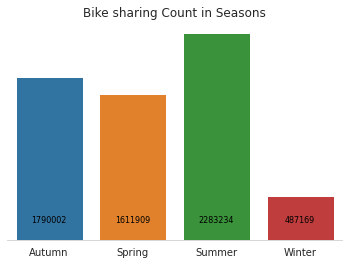

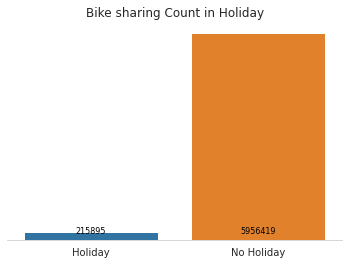

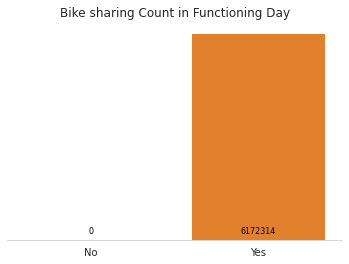

In [ ]:
# Visualizing the Total number of rented bikes/ hr for against Seasons, Holidays  Functioning days
sns.set_style("whitegrid")
for i in categorical_variables[1:]:  
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  
 # ensuring categorical variable with not more than 5 unique values are considerd
  if df[i].nunique() < 5:     
    df_sample = df.groupby([i]).sum().reset_index().iloc[:,:2]
    sns.barplot(data = df_sample, x = df_sample[i], y = 'Rented Bike Count',ci = None, ax = ax)  
    
    # Creating the bargrahph 
    plt.title('Bike sharing Count in ' + i)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left = True)
    plt.yticks([])

    for j in range(len((df[i].unique()))):
      plt.text(x = j , y = 200000, s = df_sample.loc[j,'Rented Bike Count'],color='black', fontsize=8, horizontalalignment='center')


#**From the above graphs we can say**


*   Most number of Bikes are rented in **Summer**, followed by **Autumn** and **Spring** and **Winter**

*   People prefer booking bikes on **Working days** more than the **Holidays**

*   All the bikes were rented on the **functioning day**

In [ ]:
# Creating function to change the data format of the dataset
import datetime
def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)
    
    return df

In [ ]:
old_date_format= '%d/%m/%Y'   #.... current format of date not compatible for further EDA
new_date_format= "%Y-%m-%d"   #.... new format of date compatible for further EDA

conv_dates_series(df, 'Date', old_date_format, new_date_format)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Extracting the Date, Month and Year of each Date from Datframe
df['month'] = None
df['year'] = None
df['day'] = None

for i in range(len(df.Date)):
  df['month'][i] = df['Date'][i][5:7]
  df['year'][i]  = df['Date'][i][:4]
  df['day'][i]  = df['Date'][i][8:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df.head()  # ... inspecting the newly created columns

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,01
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,01
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,01
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,01
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,01


In [ ]:
# Visualzing total Bikes rented in each month
df_by_month = df.groupby(['month']).sum().reset_index().iloc[:,:2]

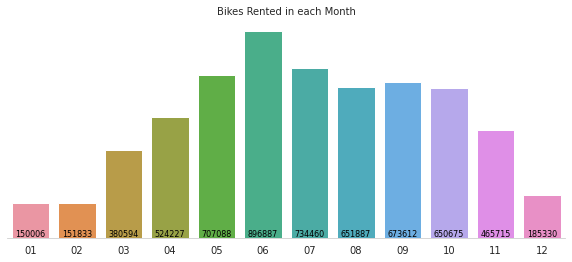

In [ ]:
fig  = plt.figure(figsize = (10,4))
sns.barplot(data= df_by_month, x = 'month', y = 'Rented Bike Count')
plt.title ('Bikes Rented in each Month', fontsize  = 10)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
sns.despine(left = True)

for i in range(12):
  plt.text(x=i, y=8000, s=df_by_month.loc[i,'Rented Bike Count'], color='black', fontsize=8, horizontalalignment='center')



*   June is the most preferred Month for bike sharing with around **896K** bike shared.
*   July and May are the second best with total sharing of **734K** and **707K**.

*   Bike sharing was least in December and January with , **185K** and **150K**.



#**Analysing Numerical Features**

In [ ]:
#creating list of numerical features
numeric_features = df.describe().columns


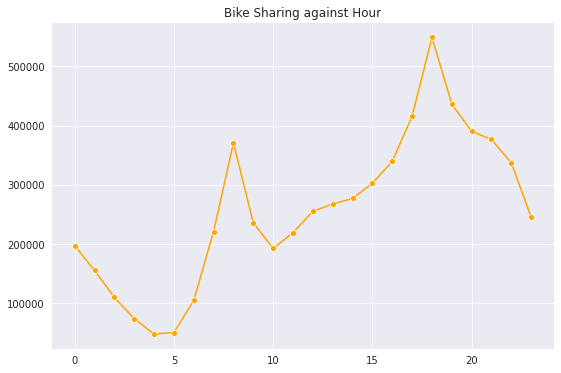

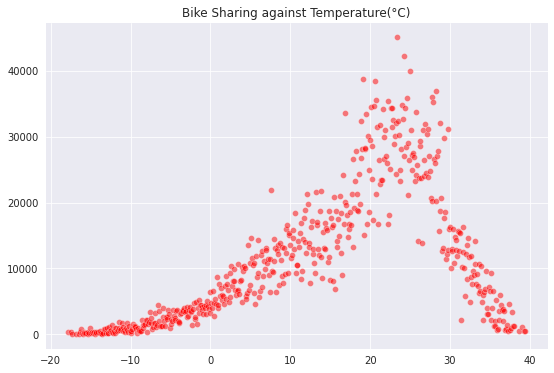

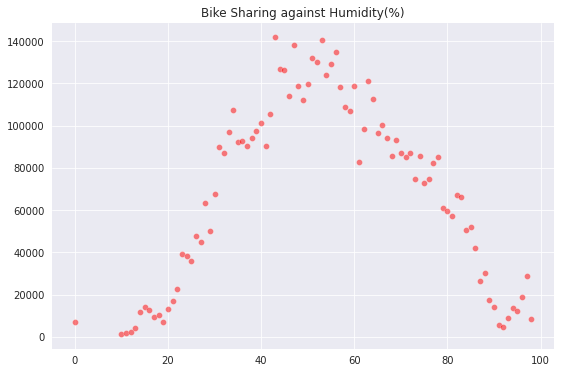

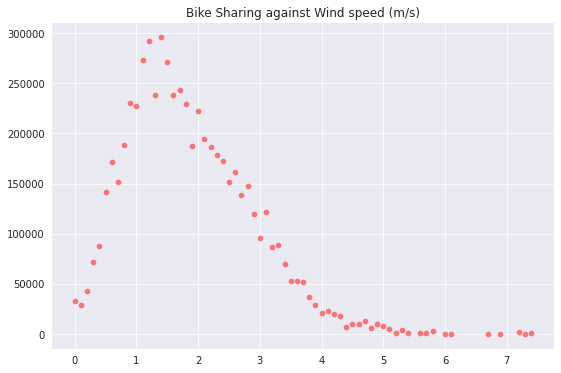

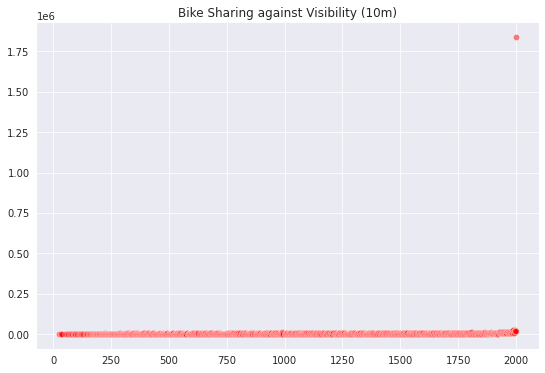

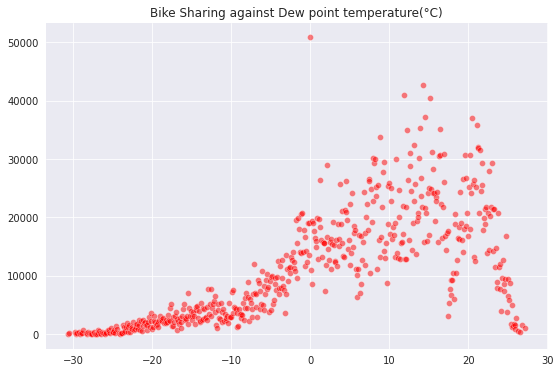

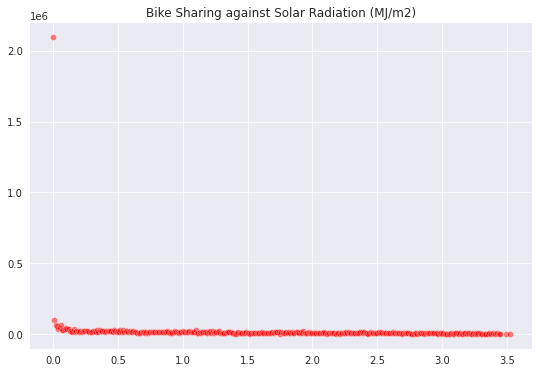

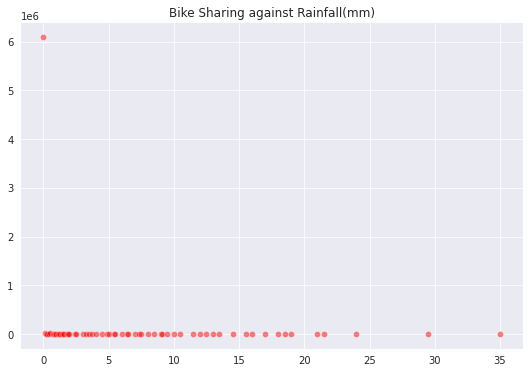

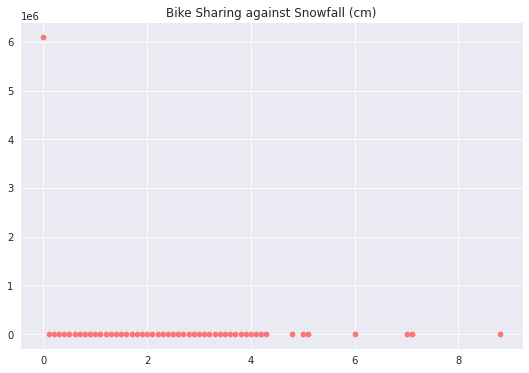

In [ ]:
# Visualizing Bike rented count against Numerical Features
for i in (numeric_features[1:]):   #....exlcuding the bike rented count from for loop
  sns.set_style('darkgrid')        # ... setting up the background for the plot 
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()

  if df[i].nunique() < 25:       #... Creating line plot for varible with less than 25 unique values
    sns.lineplot(data = df.groupby([i]).sum().reset_index().iloc[:,:2], x = i ,  y = 'Rented Bike Count',color = 'orange',marker = "o", ax = ax)
    
  else:                          #... Creating scatterplot for variable with more than 25 unique values
    sns.scatterplot(data = df.groupby([i]).sum().reset_index().iloc[:,:2], x = i ,  y = 'Rented Bike Count',color = 'red',ax =ax, alpha = 0.5)  
    
  plt.xlabel('')
  plt.ylabel('')
  ax.set_title(f'Bike Sharing against {i}')
  sns.despine(left = True, bottom =True)

#**from the above sctter polts we got to know that**



*   Bike sharing is at its peak between **4pm- 6pm**

*   Bike shaing is least between **4am-6am.**

*   Most preferred temperature for bike renting is **20-30 Degree Celcius.**

*   Bike sharing is least when temperatur is **< 5 and >35 Degree Celcius.**

*   Humidity of **40%-60%** is most favourable for bike sharing.

*   Wind speed of **1m/s -2 m/s** is most favourable for bike sharing.

*   Bike sharing count is directly related to Visbility in the area.

*   Dew Point Temperature of **5-25 Degree Celcius** is most favourable for bike sharing.

*   **Optimum Solar Radiation, no rainfall and no snowfall** leads to higher bike renting in Seoul.

#**Visualizing co-relation between Count of Rented bike and numerical variables**

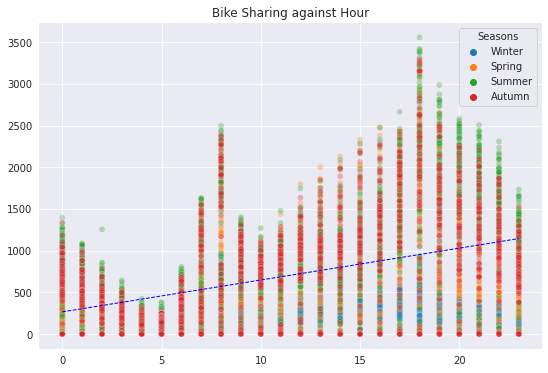

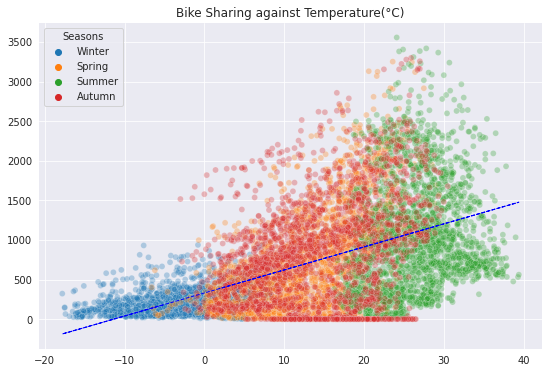

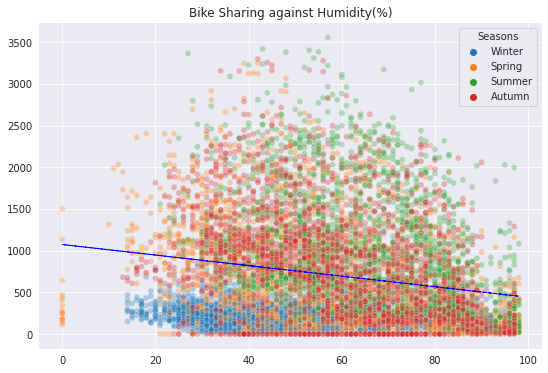

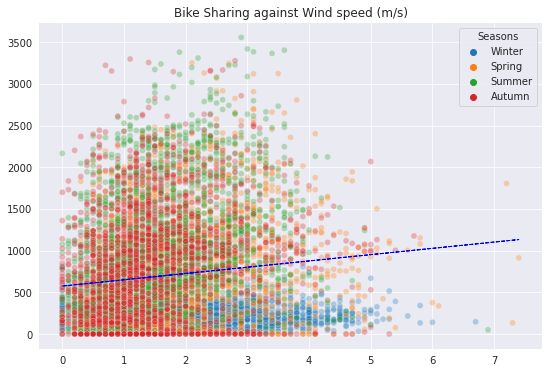

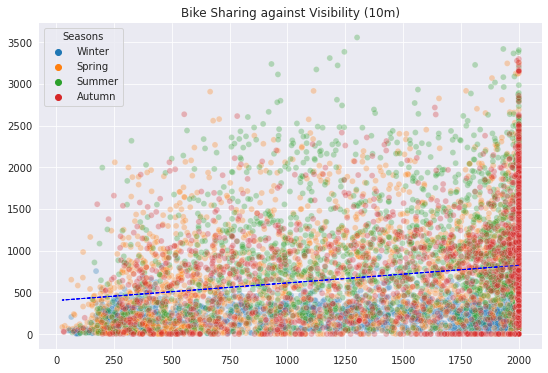

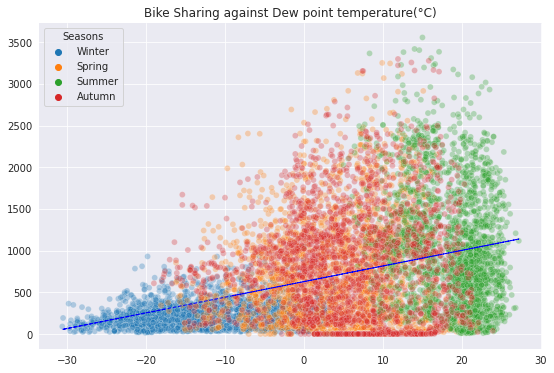

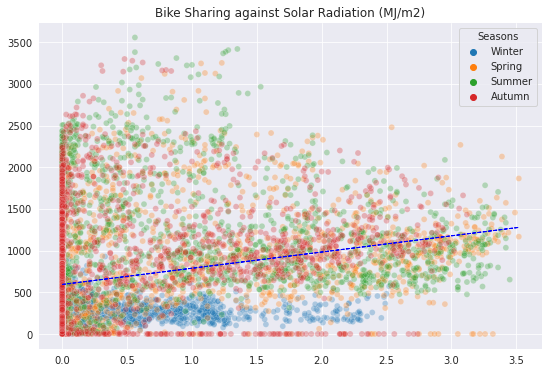

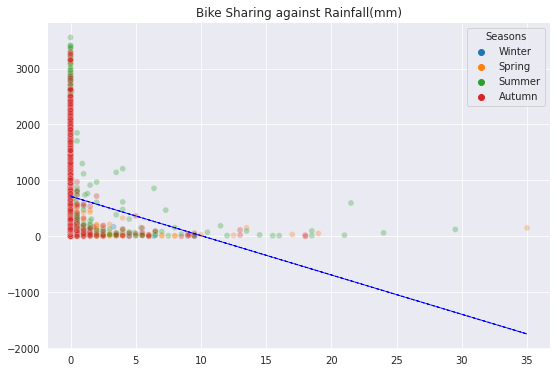

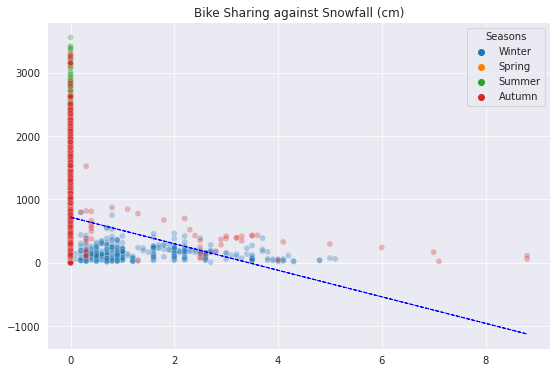

In [ ]:
# Creating scatterplot to determine the co-relation
for i in (numeric_features[1:]):
  sns.set_style('darkgrid')
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  
  sns.scatterplot(data = df, x = i ,  y = 'Rented Bike Count' ,hue = 'Seasons', ax =ax, alpha = 0.3)  #... using Season as hue to see the distribution of count

  z = np.polyfit(df[i], df['Rented Bike Count'], 1)  # creating best fit line
  y_hat = np.poly1d(z)(df[i])
  plt.plot(df[i], y_hat, "b--", lw=1)
    
  plt.xlabel('')
  plt.ylabel('')
  ax.set_title(f'Bike Sharing against {i}')
  sns.despine(left = True, bottom =True)

*   Bike sharing count is positively co- related to Hour as the Hours Progress from 0 (12 am) to 20 (8pm) the bike sharing count increases.


*   Bike sharing is positively co-related to tempearature as the temperature approaches 30*C. 


*   Though one thing to notice the positive co-relation is applicable only because temp is Seoul rarely crosses 40 Degress

*   Humidity, Snowfall, Rainfall, are negatively co-related to Bike rent count.


*   Solar radiation and Dew Point temperatuer are slightly positively realted to Bike sharing count.

In [ ]:
# Visualizing numerical variables again Holidays
for i in (numeric_features[1:]):
  sns.set_style('darkgrid')
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.scatterplot(data = df, x = i ,  y = 'Rented Bike Count' ,hue = 'Holiday', ax =ax, alpha = 0.5)
  plt.xlabel('')
  plt.ylabel('')
  ax.set_title(f'Bike Sharing against {i}')
  sns.despine(left = True, bottom =True)



*   Bike sharing is minimal on Holidays irrespective of the temperature,humidity , solar radiation,snowfall compare to Working days


In [ ]:
print(df.describe(include = ['object']).columns)
print(df.describe().columns)

In [ ]:
# Creating variable to analayze the changes in diffrent climatic factors as per Season

climate = ['Hour','Temperature(°C)','Humidity(%)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons']

In [ ]:
for i in climate[1:6]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.lineplot(data = df, x = 'Hour',y = i , hue = 'Seasons',color = "Blue")


*   Temperature in Summer vary between **24-31 Degrees**, in Autumn it varies between**10-18 Degrees**

*   Spring temperature are in between **9-16 Degrees** , for winter the range is **-5-3 Degress**

*   Humidity in Summer ranges from **52% - 77%**, in Autumn its **43% -74%**, for spring it varies from **41%-71%**, for winter the humidity is least from **36%-59%**

*   Solar Radiation is at its peak between **13:30pm -2:30 pm** in seoul across all the seasons  

*   **Summer and Spring** have the hightest recorded solar Radation of **2.25 MJ/m2**. Peak radiation in Autumn and Winter is aorung **1.8 MJ/m2** and **1.2 MJ/m2**.


*   Rainfall is most likely to occur in summer and Spring in Seoul.

*   Seoul experinces Heavy snowfall in winter followed by Autumn.








In [ ]:
# Plotting Heat map for CO-relation between Feature and Labels
plt.rcParams['figure.dpi'] = 150
sns.set(font_scale= 0.55)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues',annot_kws={'size': 5})



*   Heat map shows slightly postive relation of Rented bike count with **Hour, Temperature,Dew point Temperature, Solar Radiaton**

*   Bike sharing count is negatively co-related to **Humidity, Snowfall, Rainfall**

*   Temperature and Dew point temperature are positively co-related.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# defining function to get the VIF of dataframe
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Converting the month, year and days columns to numeric type
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_numeric(df['year'])
df['day'] = pd.to_numeric(df['day'])

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

 
*   From above Dataframe Year column has the highest multicolinearity.

*   we wil have to drop year column from Regression analaysis to ensure the accurate prediction from Linear regression model






In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])  # ... dropping year colum from Dataset



*   As we can see the VIF of all the variable has dropped remarkably after droppig the year column




#**Dealing with Outliers**

In [ ]:
# Checking for outliers in the dataset
sns.boxplot(data = df, x ='Rented Bike Count',color='skyblue')



*   As we see there are many outliers in the dataset need to drop them for the accurate model predictions




In [ ]:
# Defining the interquartile range for Dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['Rented Bike Count'])

In [ ]:
# Removing outliers from the data
df_subset = df[(df['Rented Bike Count']>lower_bound) & (df['Rented Bike Count'] <upper_bound)]
sns.boxplot(data = df_subset, x = 'Rented Bike Count',color='skyblue')

In [ ]:
df.head()
x = df_subset.drop(['Date','Rented Bike Count','year'],axis =1) # .. droping the Dependent variable and , date and year column
y =  df_subset['Rented Bike Count']

In [ ]:
#Checking the independent variable dataset
x

In [ ]:
# Creating dummy variables for Categorical independent variables
x = pd.get_dummies(x,columns = ['Seasons','Holiday','Functioning Day'])

In [ ]:
numeric_variables = x.describe().columns.to_list()   # .. defining the numeric variables

In [ ]:
# Applying zscore to normalize the data
from scipy.stats import zscore
x = x.apply(zscore)

In [ ]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test =  train_test_split(x, y, test_size = 0.2, random_state= 1)

##**Linear Regression Analysis**

In [ ]:
# fitting the linear regression for train set
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
reg.score(x_train,y_train)

In [ ]:
# calculating predicted variable using best fit regression line
y_pred = reg.predict(x_test)
y_pred_train  = reg.predict(x_train)

In [ ]:
# Caluculating Metrics of ML model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_test  = mean_squared_error((y_test), (y_pred))
MSE_train  = mean_squared_error((y_train), (y_pred_train))
print("MSE_test :" , MSE_test)
print("MSE_train :" , MSE_train)

MAE_test= mean_absolute_error((y_test),(y_pred))
MAE_train  = mean_absolute_error((y_train), (y_pred_train))
print("MAE_test :" ,MAE_test)
print("MAE_train :" ,MAE_train)

RMSE_test = np.sqrt(MSE_test)
RMSE_train = np.sqrt(MSE_train)
print("RMSE_test :" ,RMSE_test)
print("RMSE_train :" ,RMSE_train)

In [ ]:

# Calulating the R-Square and Adjusted R-square 
r2_test = r2_score((y_test), (y_pred))
r2_train = r2_score((y_train), (y_pred_train))
print("R2_test :" ,r2_test)
print("R2_train :" ,r2_train)
print("Adjusted R2_test : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2_train : ",1-(1-r2_score((y_train), (y_pred_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

In [ ]:
# Visualizing the predicated vs Actual test values
sns.scatterplot(y_pred,y_test,size = 2, alpha = 0.5,color= "navy")
plt.ylabel('Actual Bike Rented Count')
plt.xlabel('Predicted Bike Rented Count')



*   Its evident that simple linear model is not giving us much accuracy. 
*   R-score is 0.55 and Adj R-score is 0.54





In [ ]:
# Visualizing the residual values distribution
fig=plt.figure(figsize=(4,4))
  
sns.distplot(((y_test)- (y_pred)),bins=20,color = "coral")

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 12)   



*   Linear Regression model residual values ranging from -1500 to 2000.

*   lets see if we can reduce the width of this plot using other ML models


##**Lasso Regression**

In [ ]:
# Applying lasso Regerssion
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 10000)

lasso.fit(x_train, y_train)


In [ ]:
lasso.score(x_train, y_train)

In [ ]:
y_pred_l = lasso.predict(x_test)
y_pred_l_train = lasso.predict(x_train)

In [ ]:
#Evaluation Metrics
MSE_l_test  = mean_squared_error((y_test), (y_pred_l))
MSE_l_train  = mean_squared_error((y_train), (y_pred_l_train))

print("MSE_test :" , MSE_l_test)
print("MSE_train :" , MSE_l_train)

MAE_l_test = mean_absolute_error((y_test), (y_pred_l))
MAE_l_train = mean_absolute_error((y_train), (y_pred_l_train))
print("MAE_test :" ,MAE_l_test)
print("MAE_train :" ,MAE_l_train)

RMSE_l = np.sqrt(MSE_l_test)
RMSE_l_train = np.sqrt(MSE_l_train)
print("RMSE :" ,RMSE_l)
print("RMSE_train :" ,RMSE_l_train)

r2_l = r2_score((y_test), (y_pred_l))
r2_l_train = r2_score((y_train), (y_pred_l_train))
print("R2 :" ,r2_l)
print("R2_train :" ,r2_l_train)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2_train : ",1-(1-r2_score((y_train), (y_pred_l_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

In [ ]:
# Scatterplot Predicted vs Acutal for Lasso Regeression
sns.scatterplot((y_pred_l),(y_test),alpha =0.5, size =2,color = 'brown')
plt.ylabel('Actual Bike Rented Count')
plt.xlabel('Predicted Bike Rented Count')



*   Using Lasso regeression the model accuracy has further reduced

*   R-Score is 0.55 and Adj R-score is 0.54



In [ ]:
# Residual plot for Lasso Regression 
fig=plt.figure(figsize=(4,4))
  
sns.distplot(((y_test)- (y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 8)   


*   the Resdiual plot more or less remains the Same even with the Lasso Regression.


*   lets try Hyperparameter tuning to see if it improves our accuracy score.




##**Lasso regression using Hypermeter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Using GridSearchCV on the DataSet
lasso = Lasso(normalize=True, tol=1e-2)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso_train = lasso_regressor.predict(x_train)

In [ ]:
# Calculating Metrics for Grid Search CV on Lasso

MSE  = mean_squared_error((y_test), (y_pred_lasso))
MSE_train  = mean_squared_error((y_train), (y_pred_lasso_train))
print("MSE :" , MSE)
print("MSE_train :" , MSE_train)

MAE = mean_absolute_error((y_test), (y_pred_lasso))
MAE_train = mean_absolute_error((y_train), (y_pred_lasso_train))
print("MAE :" ,MAE)
print("MAE_train :" ,MAE_train)

RMSE = np.sqrt(MSE)
RMSE_train = np.sqrt(MSE_train)
print("RMSE :" ,RMSE)
print("RMSE_train :" ,RMSE_train)

r2 = r2_score((y_test), (y_pred_lasso))
r2_train = r2_score((y_train), (y_pred_lasso_train))
print("R2 :" ,r2)
print("R2_train :" ,r2_train)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2_train : ",1-(1-r2_score((y_train), (y_pred_lasso_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

In [ ]:
# Predicted vs Acutal for Grid Search CV
sns.scatterplot((y_test), (y_pred_lasso),size = 2, alpha = 0.5)
plt.xlabel('Actual COunt of Rented Bikes')
plt.ylabel('Predicted Count of Rented Bikes')



*   Accuracy using Hyperparameter as well is as below R-Score 0.55 and Adjusted R-score -0.54


In [ ]:
#Resildual Analysis
fig=plt.figure(figsize=(4,4))
  
sns.distplot(((y_test)- (y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 8)   



*   Residual plot remains the same using Hyperparameters as well.

*   Possible reason of such low accuracy using Linear model are.


     1.   No Strong positive corelation between the independent and Dependent  variables.
     2.   No strong linear relationship between the independent and Dependent variables.


*   Lets try to approch this using Other Non Linear Machine learning Models


#**Applying Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeRegressor
regeressor = DecisionTreeRegressor(random_state = 100)
regeressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=100)

In [59]:
y_predict = regeressor.predict(x_test)

In [60]:
# Metrics for Decision Tree
MSE_dt  = mean_squared_error((y_test), (y_predict))
print("MSE :" , MSE_dt)


MAE_dt= mean_absolute_error((y_test),(y_predict))
print("MAE :" ,MAE_dt)


RMSE_dt = np.sqrt(MSE_dt)
print("RMSE :" ,RMSE_dt)


MSE : 83584.74317257409
MAE : 164.45613015688554
RMSE : 289.1102612716714


In [61]:
# Accuracy of Decision Tree
r2_dt = r2_score((y_test), (y_predict))

print("R2 :" ,r2_dt)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.7585456177570638
Adjusted R2 :  0.7558485964386535


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Count of Rented Bikes')

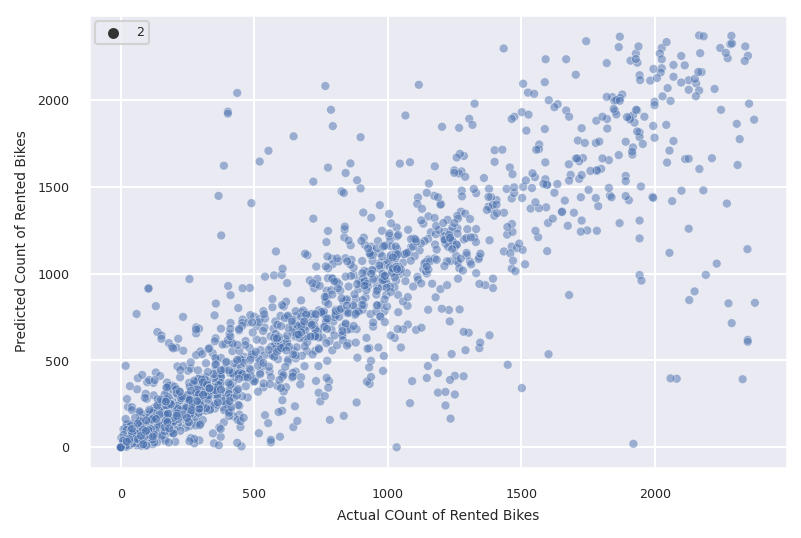

In [62]:
# Predicted Vs actual for Decision Tree
sns.scatterplot(y_predict,y_test,size  = 2,alpha = 0.5)
plt.xlabel('Actual COunt of Rented Bikes')
plt.ylabel('Predicted Count of Rented Bikes')



*   Decision tree improve the accuracy significanlty on the Test set with the R-score of 0.754 and Adjusted R-score of 0.751

*   its evident from the above plot the Predicted and Acutal values are much closer compare to Linear Model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

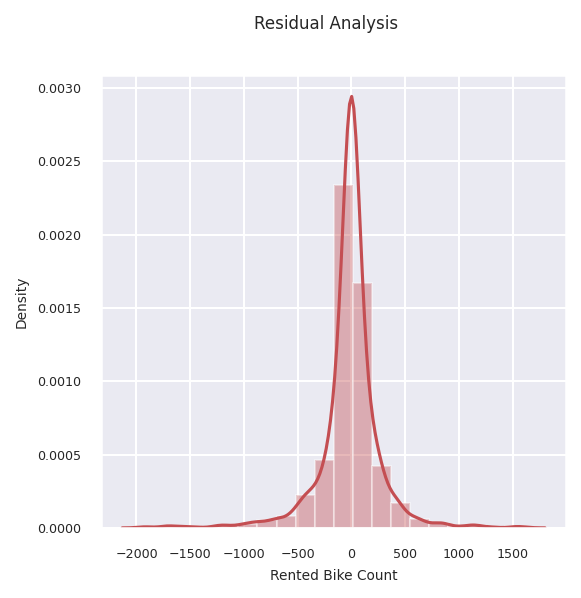

In [63]:
  # Residual KDE plot for Decision Tree
  fig=plt.figure(figsize=(4,4))
    
  sns.distplot(((y_test)- (y_predict)),bins=20,color='r')

  #Plot Label
  fig.suptitle('Residual Analysis', fontsize = 8)   



*   Residual values are reduced remarkably for Decision tree.

*   the KDE plot is much leaner and and most of Residual values are closer to zero.



##**Default XG BOOST**

In [67]:
import xgboost as xgb

In [68]:
xgb=xgb.XGBRegressor( colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=8, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective="reg:linear", random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [69]:
xgb.fit(x_train,y_train)

[03:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, min_child_weight=8)

In [70]:
xgb.score(x_train,y_train)

0.9313911585556158

In [71]:
xgb.score(x_test,y_test)

0.8726310933031269

In [72]:
# Validating Assumptions
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

print(y_train_pred_xgb)

[ 308.51846 1834.9591  1956.619   ...  344.42593  208.95898  326.14038]


In [75]:

def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))



In [76]:
# Evaluation of training Data
print_metrics(y_test, y_test_pred_xgb)

#Find R-squared value
r2 = r2_score(y_test, y_test_pred_xgb)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_xgb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 44091.547461409304
RMSE is 209.97987394369324
MAE is 131.5536955427043
r2:0.8726310933031269
Adj_r2:0.8712083953447256


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Count of Rented Bikes')

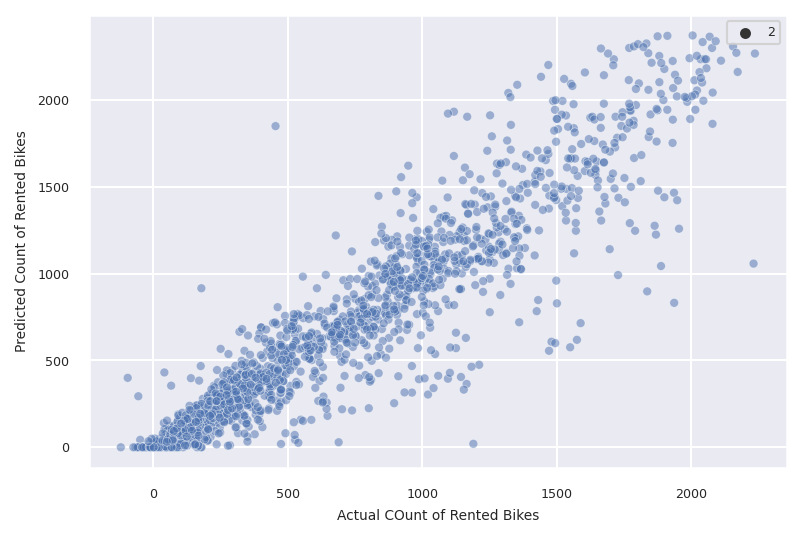

In [77]:
# Predicted vs Actual plot for Xg boost
sns.scatterplot(y_test_pred_xgb,y_test,size  = 2,alpha = 0.5)
plt.xlabel('Actual COunt of Rented Bikes')
plt.ylabel('Predicted Count of Rented Bikes')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

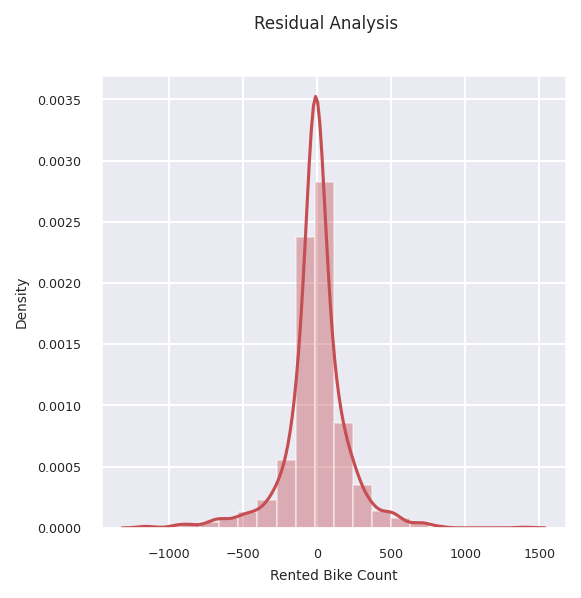

In [78]:
# Residual KDE plot for xg boost
fig=plt.figure(figsize=(4,4))
  
sns.distplot(((y_test)- (y_test_pred_xgb)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 8) 

#**Applying Random Forest**

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor1.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [80]:
y_predict_rf = regressor1.predict(x_test)

In [81]:
# Metrics for Random Forest
MSE_rf  = mean_squared_error((y_test), (y_predict_rf))
print("MSE :" , MSE_rf)

MAE_rf= mean_absolute_error((y_test),(y_predict_rf))
print("MAE :" ,MAE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

MSE : 42747.14461905869
MAE : 128.21190005810575
RMSE : 206.75382612918844


In [82]:
# Accuracy of Randomg FOrest
r2 = r2_score((y_test), (y_predict_rf))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.8765147202123489
Adjusted R2 :  0.8751354019783892


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Count of Rented Bikes')

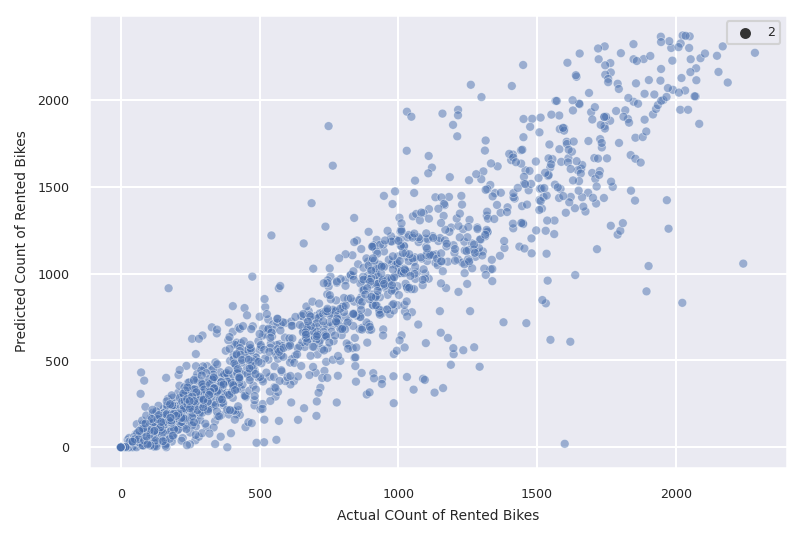

In [83]:
# Predicted vs Atucal for Random forest
sns.scatterplot(y_predict_rf,y_test,size  = 2,alpha = 0.5)
plt.xlabel('Actual COunt of Rented Bikes')
plt.ylabel('Predicted Count of Rented Bikes')



*   Random Forest gives R-score of 0.876 and Adjusted R-score of 0.875
*   Predicted and actual values of test set follow a ideal line relation here.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

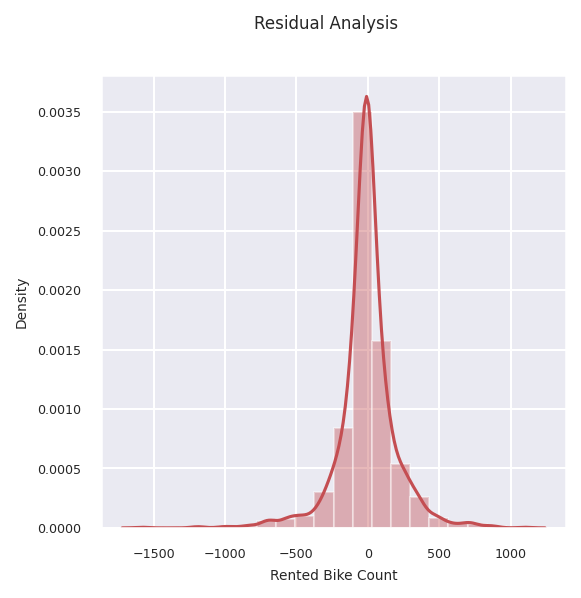

In [84]:
# Residual plot for Random Forest
fig=plt.figure(figsize=(4,4))
  
sns.distplot(((y_test)- (y_predict_rf)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 8)  



*   the Residual error are reduced significantly using Random forest.
*   Majoirity of the Residual error are condensed around zero.



##**Feature Importance**

In [85]:
# Calculating  the feature importance
feature_names = x_train.columns
feature_imp = pd.DataFrame({'cols':feature_names, 'imp':regressor1.feature_importances_}).sort_values('imp', ascending=False).reset_index()
feature_imp

,index,cols,imp
0,1,Temperature(°C),0.295206
1,0,Hour,0.271524
2,6,Solar Radiation (MJ/m2),0.072770
3,2,Humidity(%),0.067248
4,7,Rainfall(mm),0.061274
5,17,Functioning Day_No,0.049377
6,18,Functioning Day_Yes,0.048294
7,5,Dew point temperature(°C),0.028041
8,14,Seasons_Winter,0.017949
9,10,day,0.017023


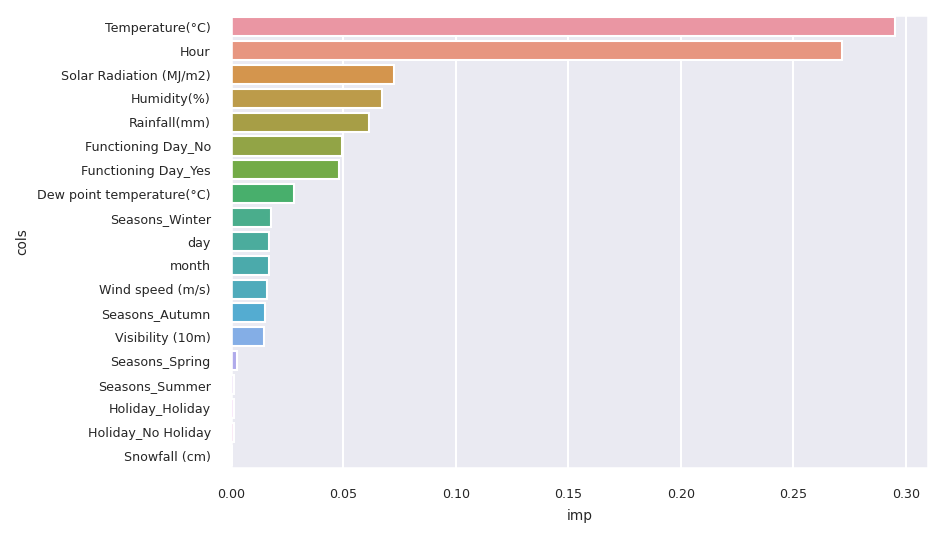

In [86]:
# Visualizing the Feature importance
sns.barplot(data = feature_imp, y = 'cols', x = 'imp')

#**Summary Table ML models**

In [88]:
# Summary table of ML models
from prettytable import PrettyTable
data_table = PrettyTable(['SL NO',"MODEL_NAME", "MSE", "RMSE","MAE",'R^2','Adjusted R^2'])
data_table.add_row(['1','Linear Regression','155676.033','394.558','301.067','0.550','0.545'])
data_table.add_row(['2','Lasso Regression','155673.688','394.555','301.060','0.550','0.545'])
data_table.add_row(['3','Gride Search CV',' 155675.866','394.557','301.067','0.550','0.545'])
data_table.add_row(['4','Decision Tree','83584.743','289.110','164.456',"0.754",'0.751'])
data_table.add_row(['6','Default_XG boost','44091.547','209.979','131.553','0.872','0.871'])
data_table.add_row(['7','Random Forest','42747.144','206.753','128.211',"0.876",'0.875'])
print(data_table)

+-------+-------------------+-------------+---------+---------+-------+--------------+
| SL NO |     MODEL_NAME    |     MSE     |   RMSE  |   MAE   |  R^2  | Adjusted R^2 |
+-------+-------------------+-------------+---------+---------+-------+--------------+
|   1   | Linear Regression |  155676.033 | 394.558 | 301.067 | 0.550 |    0.545     |
|   2   |  Lasso Regression |  155673.688 | 394.555 | 301.060 | 0.550 |    0.545     |
|   3   |  Gride Search CV  |  155675.866 | 394.557 | 301.067 | 0.550 |    0.545     |
|   4   |   Decision Tree   |  83584.743  | 289.110 | 164.456 | 0.754 |    0.751     |
|   6   |  Default_XG boost |  44091.547  | 209.979 | 131.553 | 0.872 |    0.871     |
|   7   |   Random Forest   |  42747.144  | 206.753 | 128.211 | 0.876 |    0.875     |
+-------+-------------------+-------------+---------+---------+-------+--------------+


#**Conclusion**

	
*   Most numbers of Bikes were rented in **Summer**, followed by **Autumn**, **Spring**, and **Winter**. **May-July** is the **peak** Bike renting **Season**, and **Dec-Feb** is the **least preferred** month for **bike renting**.

*   **Majority** of the **client** in the **bike rental sector** belongs to the **Working class**. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

*   **Temperature** of **20-30 Degrees**, evening **time 4 pm- 8 pm**,**Humidity** between **40%-60%** are the most favorable parameters where the Bike **demand** is at its **peak**.

*   **Temperature**, **Hour of the day**, **Solar radiation**, and **Humidity** are major **driving factors** for the Bike rent **demand**.


*  Feature and Labels had a weak linear relationship, hence the prediction from the linear model was very low. **Best predictions** are obtained with a **Random forest** model with an accuracy of **0.875**.